**📦 Step 1: Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import xgboost as xgb
from sklearn.inspection import permutation_importance
from google.colab import drive

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


**🔍 Step 2: Load Data & Prepare Features**

In [2]:
# Load cleaned data
drive.mount('/content/drive')

# Set working directory
working_dir = '/content/drive/MyDrive/Colab Notebooks/AI-Applications-Portfolio/amazon-sentiment-analysis'
file_path = f"{working_dir}/cleaned_amazon_data.csv"

df = pd.read_csv(file_path)

# Select relevant features for price prediction
features = ['brand', 'category_name', 'rating', 'review_count', 'availability']
X = df[features].copy()
y = df['price']

# Handle missing values
X = X.fillna({
    'rating': df['rating'].median(),
    'review_count': df['review_count'].median(),
    'availability': 'Unknown'
})

print("📊 Features shape:", X.shape)
print("🎯 Target shape:", y.shape)

Mounted at /content/drive
📊 Features shape: (269, 5)
🎯 Target shape: (269,)


**🛠️ Step 3: Preprocessing & Encoding**

In [3]:
# Encode categorical variables
label_encoders = {}
for col in ['brand', 'category_name', 'availability']:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

# Scale numerical features
scaler = StandardScaler()
X[['rating', 'review_count']] = scaler.fit_transform(X[['rating', 'review_count']])

print("✅ Preprocessing completed!")
print(X.head())

✅ Preprocessing completed!
   brand  category_name    rating  review_count  availability
0    201             21  0.034932      0.296125             1
1     14              4 -0.687883     -0.435993             1
2     91             76  1.841967     -0.479316            11
3    175             72 -1.049290     -0.185155            12
4    206             69  0.757746      0.070636            13


**📊 Step 4: Train-Test Split**

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"📈 Training set: {X_train.shape[0]} samples")
print(f"📊 Test set: {X_test.shape[0]} samples")
print(f"🎯 Target range: ${y.min()} - ${y.max()}")

📈 Training set: 215 samples
📊 Test set: 54 samples
🎯 Target range: $3.86 - $179.0


**🤖 Step 5: Initialize & Train Multiple Models**

In [5]:
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42),
    'Linear Regression': LinearRegression()
}

results = {}
for name, model in models.items():
    print(f"🚀 Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'model': model,
        'mae': mae,
        'rmse': rmse,
        'r2': r2
    }

    print(f"✅ {name} - MAE: ${mae:.2f}, R²: {r2:.3f}")

🚀 Training Random Forest...
✅ Random Forest - MAE: $19.40, R²: 0.148
🚀 Training Gradient Boosting...
✅ Gradient Boosting - MAE: $18.86, R²: 0.159
🚀 Training XGBoost...
✅ XGBoost - MAE: $20.55, R²: -0.033
🚀 Training Linear Regression...
✅ Linear Regression - MAE: $21.58, R²: -0.033


**📈 Step 6: Model Performance Comparison**

🏆 Model Performance Comparison:
Random Forest        | MAE: $ 19.40 | R²:  0.148
Gradient Boosting    | MAE: $ 18.86 | R²:  0.159
XGBoost              | MAE: $ 20.55 | R²: -0.033
Linear Regression    | MAE: $ 21.58 | R²: -0.033


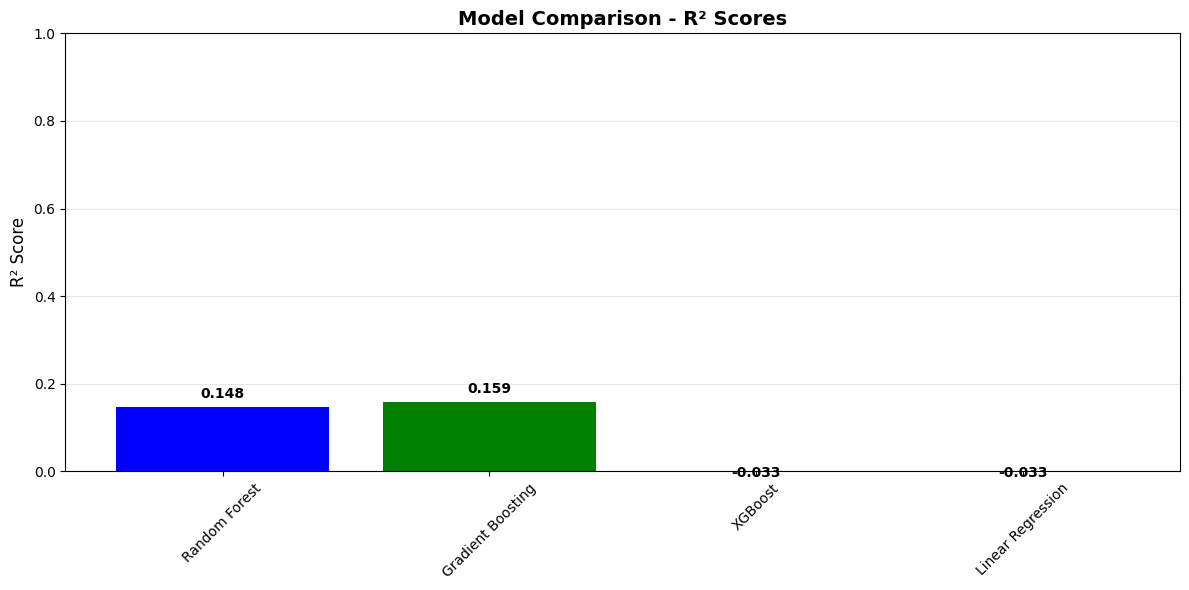

In [6]:
print("🏆 Model Performance Comparison:")
print("=" * 50)
for name, metrics in results.items():
    print(f"{name:20} | MAE: ${metrics['mae']:6.2f} | R²: {metrics['r2']:6.3f}")

# Visual comparison
plt.figure(figsize=(12, 6))
models_list = list(results.keys())
r2_scores = [results[m]['r2'] for m in models_list]

plt.bar(models_list, r2_scores, color=['blue', 'green', 'orange', 'red'])
plt.title('Model Comparison - R² Scores', fontweight='bold', fontsize=14)
plt.ylabel('R² Score', fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

for i, score in enumerate(r2_scores):
    plt.text(i, score + 0.02, f'{score:.3f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

**🔍 Step 7: Feature Importance Analysis**

🎯 Feature Importance:
         feature  importance
0          brand    0.273007
1  category_name    0.272911
3   review_count    0.236137
2         rating    0.135859
4   availability    0.082085


/tmp/ipython-input-795737605.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')


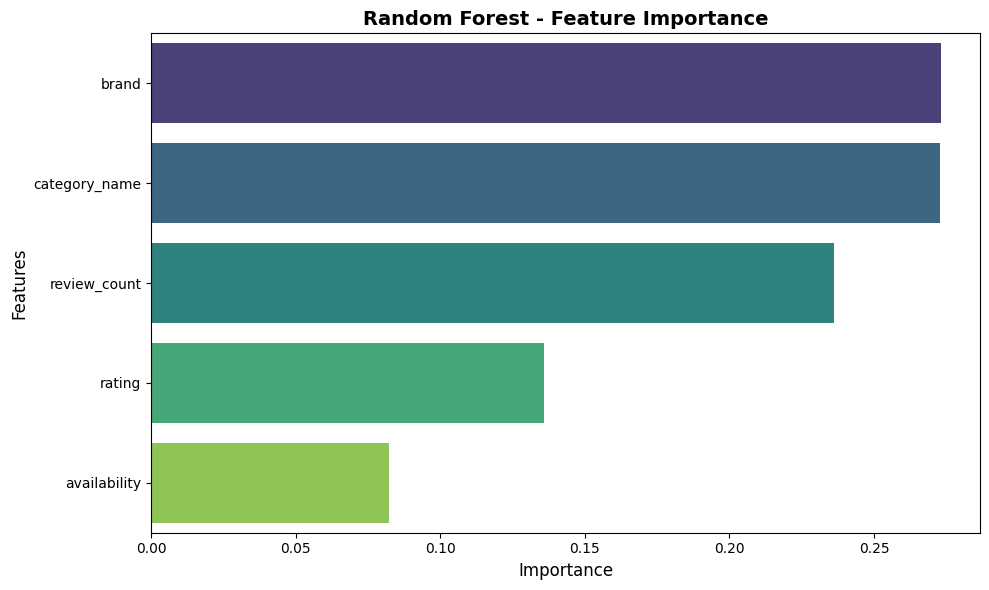

In [7]:
best_model = results['Random Forest']['model']

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

print("🎯 Feature Importance:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
plt.title('Random Forest - Feature Importance', fontweight='bold', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

**📊 Step 8: Actual vs Predicted Analysis**

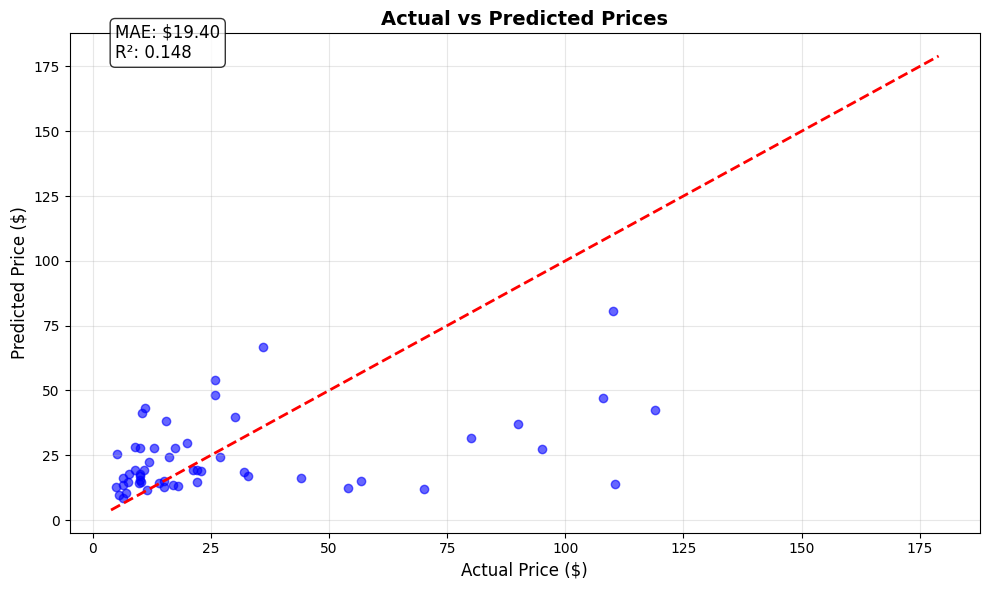

In [8]:
best_model = results['Random Forest']['model']
y_pred = best_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Price ($)', fontsize=12)
plt.ylabel('Predicted Price ($)', fontsize=12)
plt.title('Actual vs Predicted Prices', fontweight='bold', fontsize=14)
plt.grid(alpha=0.3)

# Add statistics
mae = mean_absolute_error(y_test, y_pred)
plt.text(0.05, 0.95, f'MAE: ${mae:.2f}\nR²: {r2_score(y_test, y_pred):.3f}',
         transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.savefig(f"/{working_dir}/price_prediction_results.png")
plt.show()

**💡 Step 9: Business Insights & Recommendations**

In [9]:
print("🎯 BUSINESS INSIGHTS FROM PRICE PREDICTION MODEL:")
print("=" * 55)

# Insight 1: Most influential features
top_feature = feature_importance.iloc[0]
print(f"1. 🏷️  Most important price factor: '{top_feature['feature']}' ({top_feature['importance']*100:.1f}% impact)")

# Insight 2: Model accuracy
print(f"2. 📊 Model can predict prices within ${results['Random Forest']['mae']:.2f} on average")

# Insight 3: Brand impact analysis
brand_impact = pd.DataFrame({
    'brand_encoded': range(len(label_encoders['brand'].classes_)),
    'brand_name': label_encoders['brand'].classes_
})
brand_impact['avg_impact'] = best_model.feature_importances_[0]  # Assuming brand is first feature

print(f"3. ⭐ Brand accounts for {best_model.feature_importances_[0]*100:.1f}% of price variation")

print("\n✅ Price prediction modeling completed!")

🎯 BUSINESS INSIGHTS FROM PRICE PREDICTION MODEL:
1. 🏷️  Most important price factor: 'brand' (27.3% impact)
2. 📊 Model can predict prices within $19.40 on average
3. ⭐ Brand accounts for 27.3% of price variation

✅ Price prediction modeling completed!
